<a href="https://colab.research.google.com/github/amrios80/data-analysis-airbnb/blob/master/airbnb/eda_amrios80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
**Dataset:** AirBnb Listings - San Francisco, CA, USA [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in the city. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# **1. Cargue de la informacion**

In [4]:
dataset_url="https://github.com/amrios80/data-analysis-airbnb/raw/master/data/listings.csv.gz"

# Loading the CSV file as dataframe
listings_df = pd.read_csv(dataset_url, compression='gzip')



# **2. Entendimiento inicial de los datos**

El dataset está compuesto por 7888 filas y 75 columnas, hay 21 columnas con tipo float64, 19 tipo int64 y 35 tipo object. Teniendo en cuenta que el objetivo del analisis es recomendar el mejor sector para inversion inmobiliaria en la ciudad de San Francisco (California), de que manera que se pueda asegur una alta tasa de ocupación, un precio por noche justo y un buen sistema de atención, las 5 variables que se utilizaran para el analsis son: price, availability_365, neighbourhood_cleansed, host_is_superhost, review_scores_overall y property_type.

VARIABLES NUMERICAS
*  Discretas: availability_365
*  Continuas: Price, review_scores_value


VARIABLES CATEGORICAS
*   Nominales: neighbourhood_cleansed
*   Binarios: host_is_superhost
*   Ordinales: property_type







In [5]:
# Showing dataframe dimensions
listings_df.shape

(7888, 75)

In [ ]:
# Showing column types
listings_df.dtypes

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
source,object
name,object
description,object
neighborhood_overview,object
picture_url,object
host_id,int64


In [ ]:
listings_df.sample(3) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
4541,663623,https://www.airbnb.com/rooms/663623,20240604143925,2024-06-04,city scrape,Grand victorian flat in mission SF,NaN,Fabulous inner mission neighborhood with cafes...,https://a0.muscache.com/pictures/hosting/Hosti...,119920,https://www.airbnb.com/users/show/119920,Gwen,2010-05-07,"San Francisco, CA",I am a painter in SF and also have a graphic d...,within a day,90%,41%,f,https://a0.muscache.com/im/pictures/user/a88e8...,https://a0.muscache.com/im/pictures/user/a88e8...,Mission District,1,1,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Mission,NaN,37.75620,-122.40944,Entire rental unit,Entire home/apt,5,1.5,1.5 baths,2.0,4.0,"[""Piano"", ""Private patio or balcony"", ""Extra p...",$240.00,7,28,6.0,7.0,28.0,28.0,7.0,28.0,NaN,t,1,6,6,270,2024-06-04,51,8,1,2014-08-12,2024-05-24,4.82,4.84,4.55,4.96,4.96,4.84,4.75,STR-0001506,f,1,1,0,0,0.43,240.0
5422,33017026,https://www.airbnb.com/rooms/33017026,20240604143925,2024-06-04,city scrape,City and Nature,Large suite with independent entrance and priv...,"Very quite neighborhood surrounded by both, na...",https://a0.muscache.com/pictures/40869d07-47c9...,110003688,https://www.airbnb.com/users/show/110003688,Silvia,2017-01-05,"San Francisco, CA","I am a very chill host, that loves San Francis...",within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/77ea4...,https://a0.muscache.com/im/pictures/user/77ea4...,Richmond District,2,4,"['email', 'phone']",t,t,Neighborhood highlights,Seacliff,NaN,37.78765,-122.48575,Private room in rental unit,Private room,1,1.0,1 private bath,0.0,1.0,"[""Clothing storage: closet"", ""Extra pillows an...",$85.00,31,1125,31.0,31.0,1125.0,1125.0,31.0,1125.0,NaN,t,25,25,55,173,2024-06-04,5,2,0,2019-09-14,2023-10-02,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,0,1,0,0.09,85.0
4759,894783180652973713,https://www.airbnb.com/rooms/894783180652973713,20240604143925,2024-06-04,previous scrape,Sunset District Room,This room is nestled in the beautiful sunset d...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,514846214,https://www.airbnb.com/users/show/514846214,Miko,2023-05-15,"San Francisco, CA",Hi..I love to travel and meet new people. I pr...,within a few hours,79%,41%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Outer Sunset,9,10,"['email', 'phone']",t,t,NaN,Outer Sunset,NaN,37.76342,-122.48785,Private room in home,Private room,1,NaN,1 shared bath,1.0,NaN,"[""Clothing storage: closet"", ""Lockbox"", ""Freez...",NaN,30,365,30.0,30.0,365.0,365.0,30.0,365.0,NaN,t,16,46,76,351,2024-06-04,1,1,0,2023-11-14,2023-11-14,5.00,5.00,5.00,4.00,4.00,5.00,5.00,2023-01

## 2.1 Analisis Univariado

**Atributo 1 Precio (Price) - Analisis medidas de tendencia central y distribucion:** Se observa que la variable precio tiene una desviacion estandar amplia, lo que puede significar que hayan valores muy altos o muy bajos para el precio o que haya una alta variabilidad del precio. Lo anterior se confirma observando el rango (95%) del rango intercuartiles donde se evidencia que el 5% de los listings puede llegar a tener un precio que varia entre 595 y 2500 dolares.

In [9]:
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,price_float
count,6190.000000
mean,241.385460
std,470.187742
min,25.000000
5%,57.000000
25%,105.000000
50%,166.000000
75%,261.000000
95%,595.000000
max,25000.000000


In [10]:
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

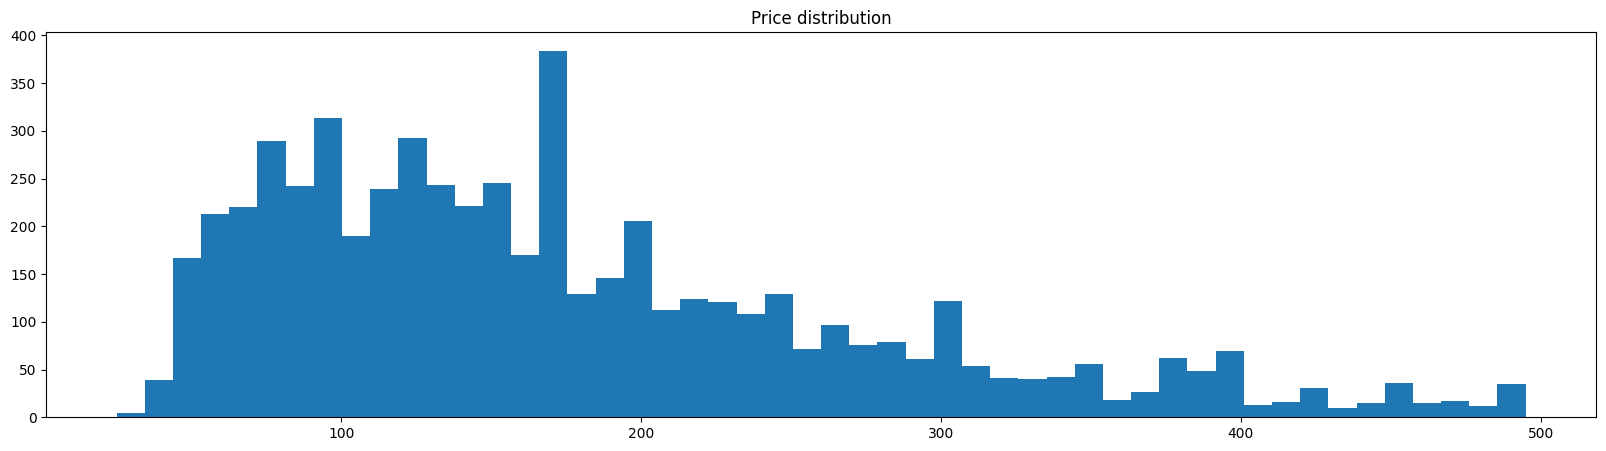

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

**Atributo 2 Disponibilidad (availability_365) - Analisis medidas de tendencia central y distribucion:**



In [ ]:
listings_df["availability_365"] = listings_df["availability_365"].astype(float)
listings_df["availability_365"].describe(percentiles=[0.25, 0.5, 0.75])

,availability_365
count,7888.000000
mean,172.637551
std,127.849030
min,0.000000
25%,51.000000
50%,165.000000
75%,294.000000
max,365.000000


[]

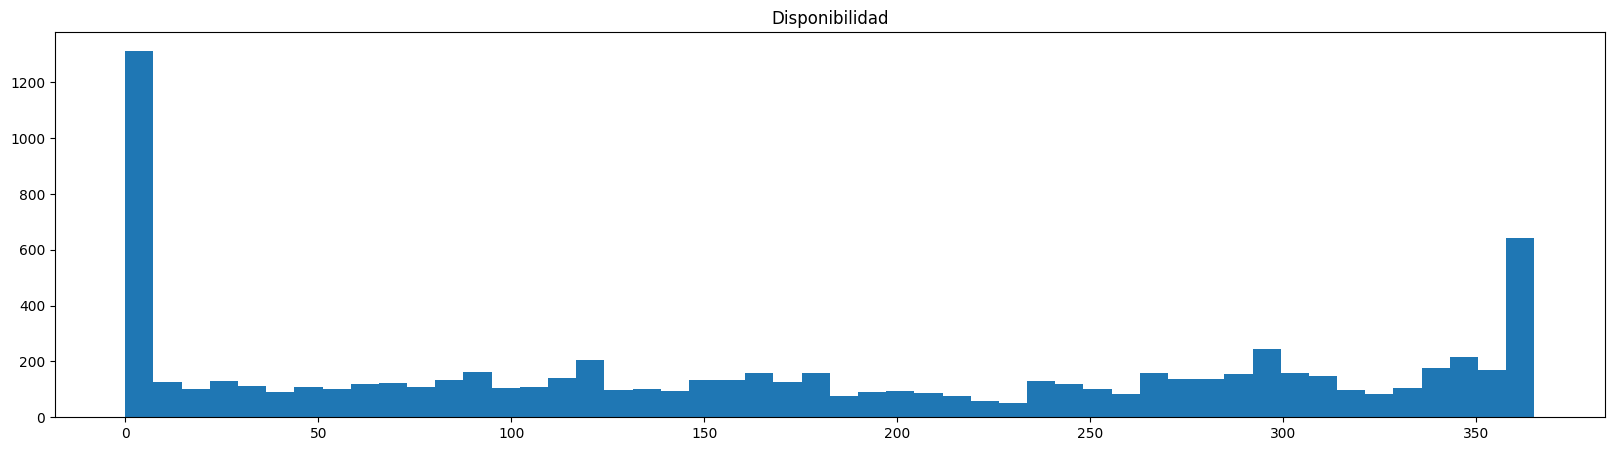

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["availability_365"] <= (q3 + 1.5 * iqr)]["availability_365"], bins=50)
plt.title("Disponibilidad")
plt.plot()

**Atributo 3 Sectores (neighbourhood_cleansed) - Analisis medidas de tendencia central y distribucion:**

In [28]:
listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

,proportion
neighbourhood_cleansed,
Downtown/Civic Center,0.153144
Mission,0.080502
South of Market,0.070740
Western Addition,0.063641
Nob Hill,0.050837
Outer Sunset,0.045512
Bernal Heights,0.041836
Castro/Upper Market,0.036511
Haight Ashbury,0.034736


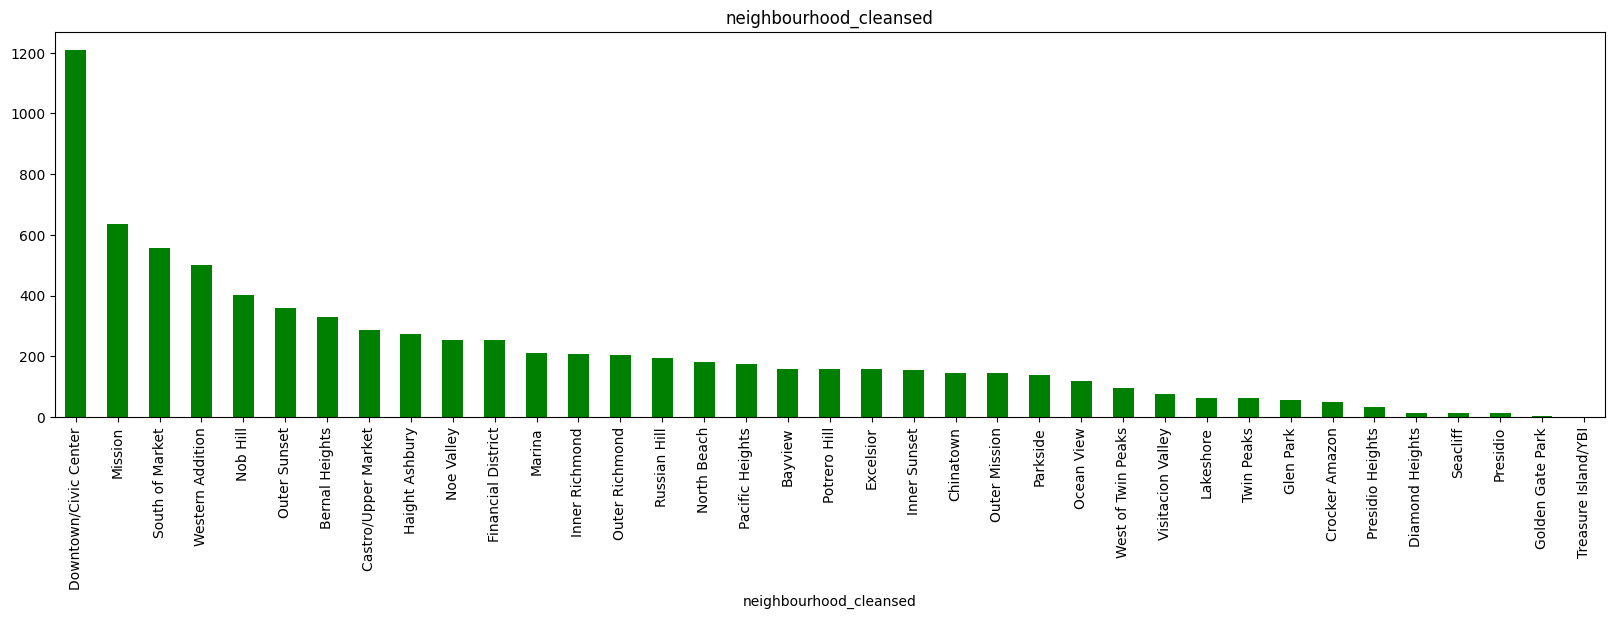

In [ ]:
fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
listings_df["neighbourhood_cleansed"].value_counts().plot(kind="bar", ax=ax1, color="green")
ax1.set_title("neighbourhood_cleansed")
plt.show()

**Atributo 4  host_is_superhost - Analisis medidas de tendencia central y distribucion:**

In [ ]:
listings_df["host_is_superhost"].value_counts(dropna=False, normalize=True)*100

,proportion
host_is_superhost,
f,56.034483
t,43.255578
NaN,0.709939


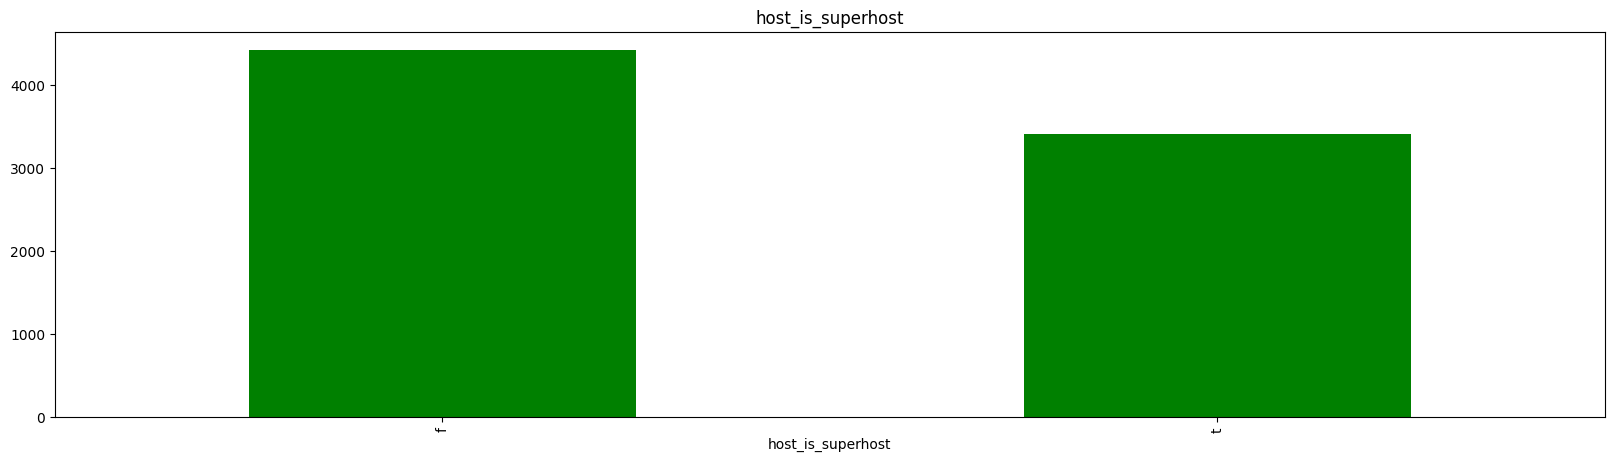

In [41]:
fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
listings_df["host_is_superhost"].value_counts().plot(kind="bar", ax=ax1, color="green")
ax1.set_title("host_is_superhost")
plt.show()

# **3. Estrategia de Analisis**

In [11]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(571, 76)

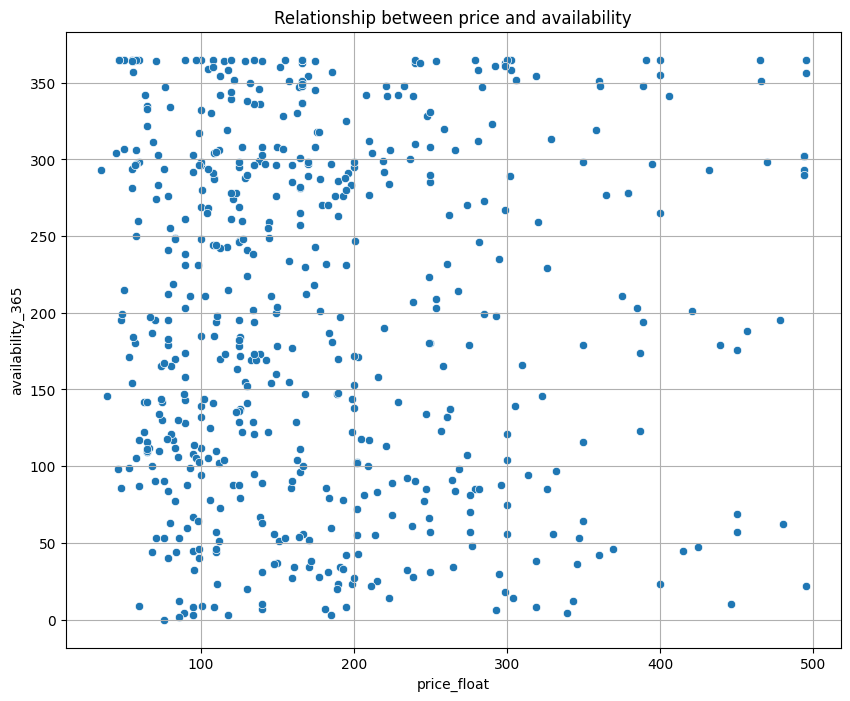

In [24]:
# Plotting the relationship between price and availability
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["availability_365"]
)
plt.title("Relationship between price and availability")
plt.grid()
plt.show()

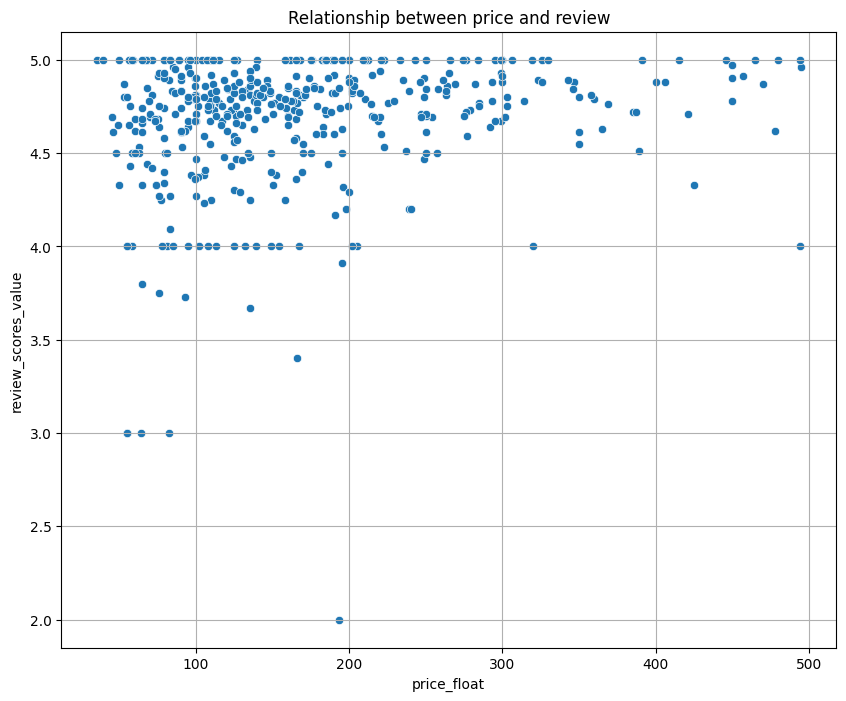

In [25]:
# Plotting the relationship between price and review_scores_value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review")
plt.grid()
plt.show()

In [46]:
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

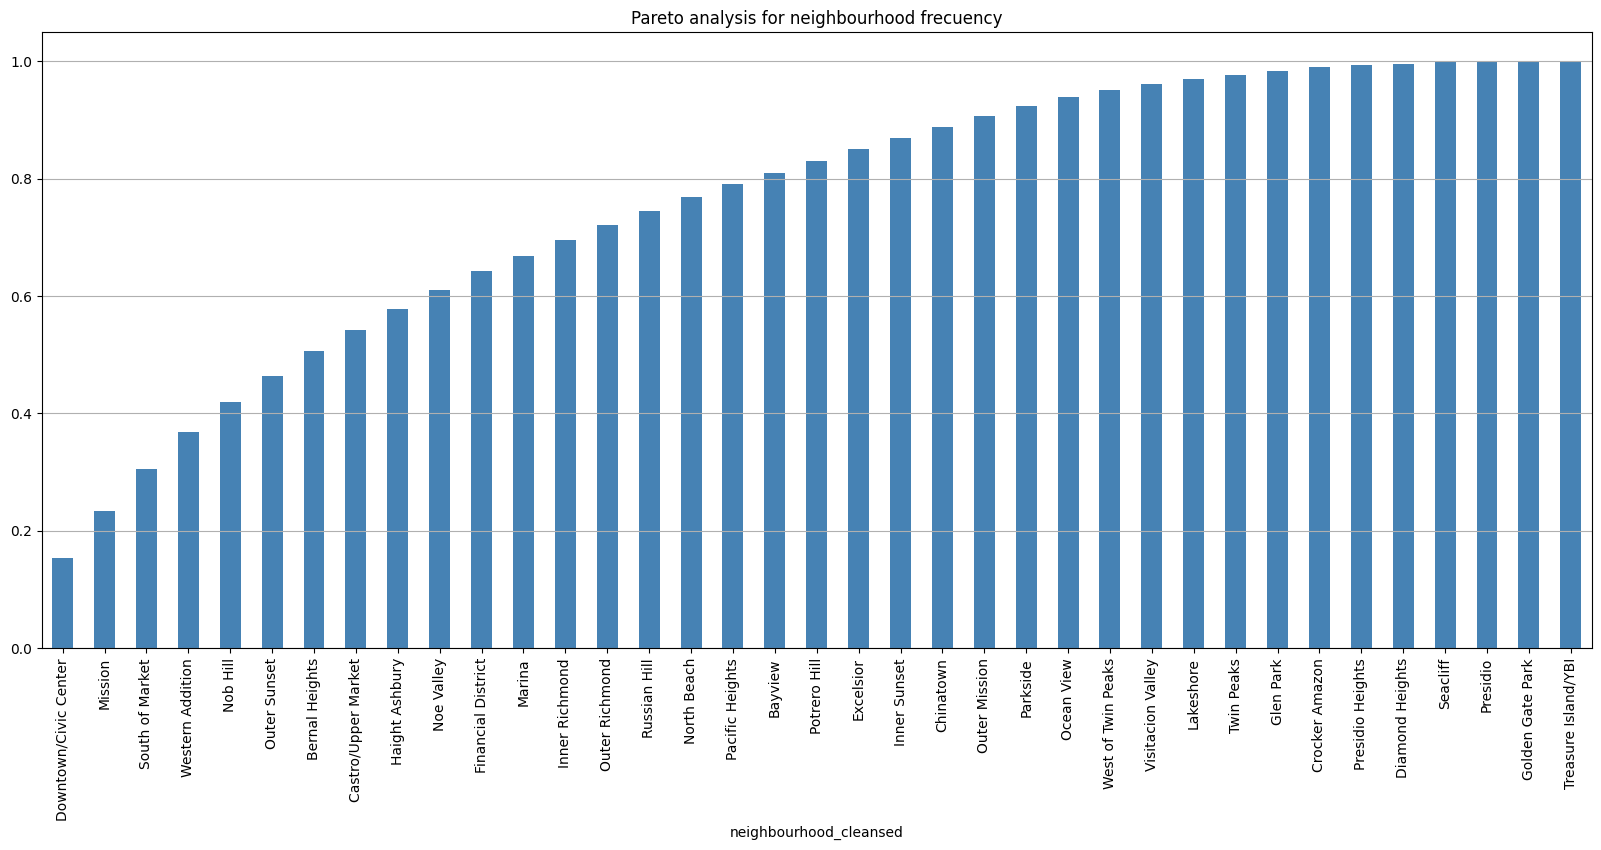

In [49]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [30]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Downtown/Civic Center',
 'Mission',
 'South of Market',
 'Western Addition',
 'Nob Hill',
 'Outer Sunset',
 'Bernal Heights',
 'Castro/Upper Market',
 'Haight Ashbury',
 'Noe Valley',
 'Financial District',
 'Marina',
 'Inner Richmond',
 'Outer Richmond',
 'Russian Hill',
 'North Beach',
 'Pacific Heights']

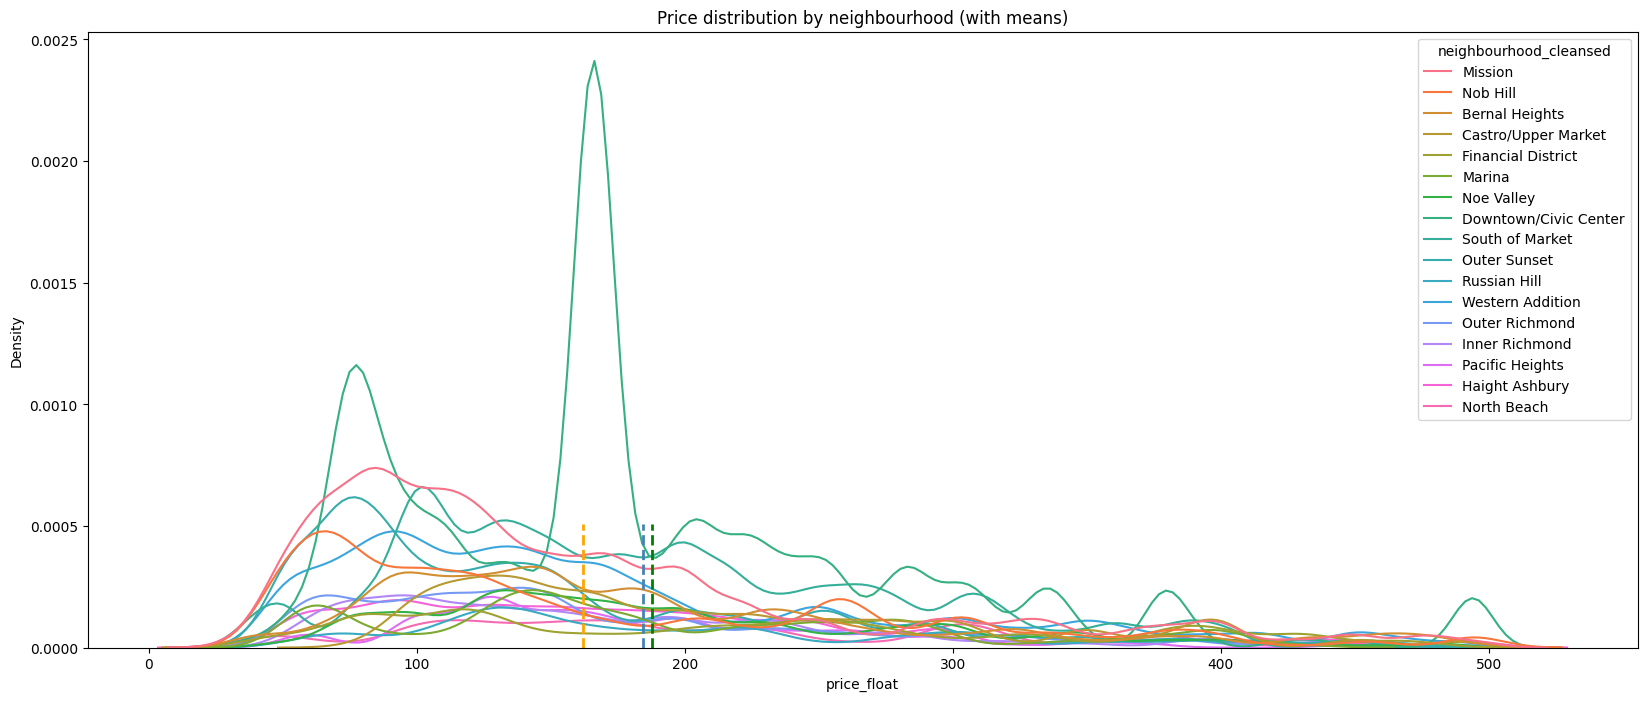

In [31]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

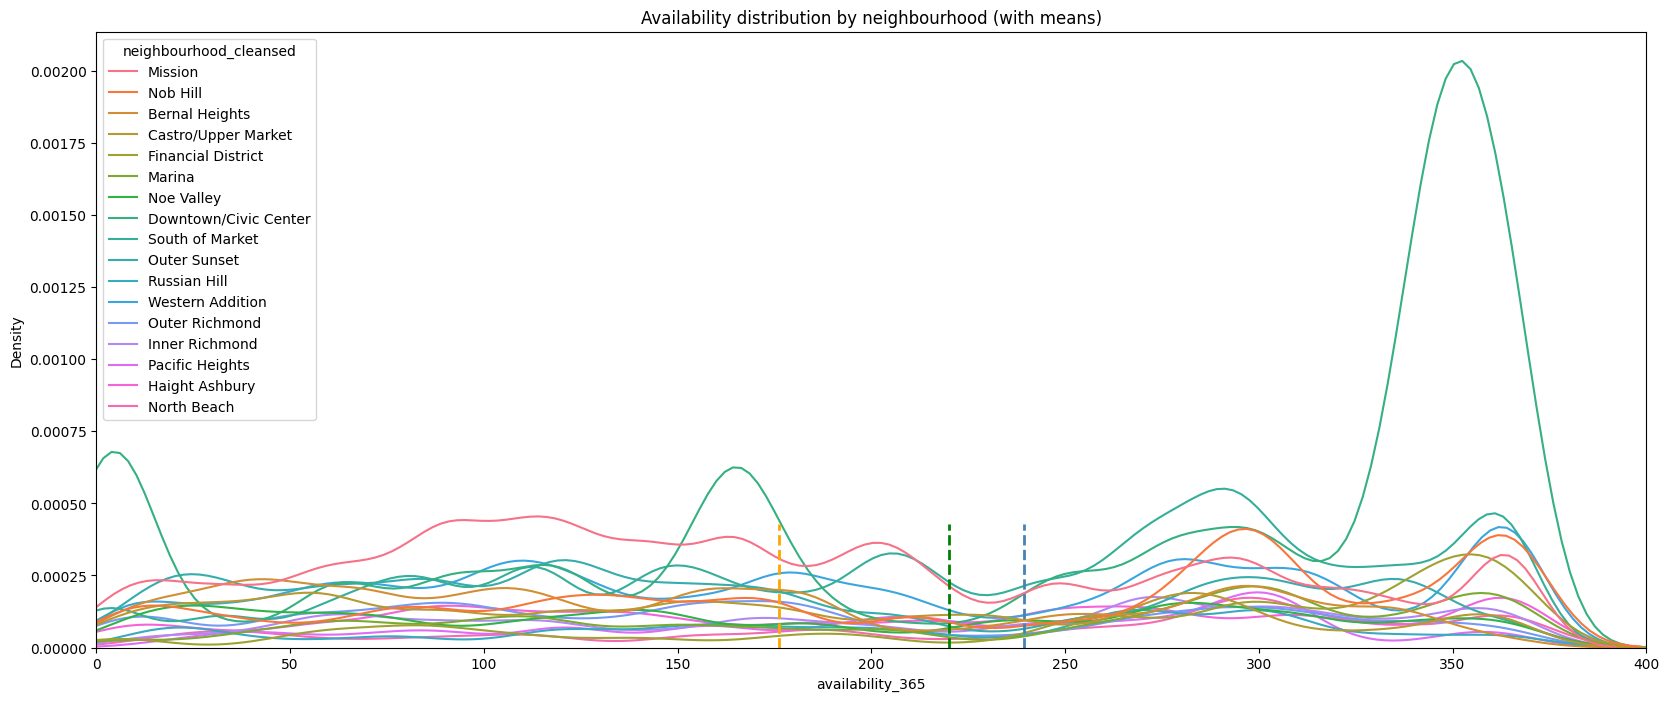

In [38]:
# Plotting number of availability distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="availability_365",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "availability_365"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Availability distribution by neighbourhood (with means)")
plt.xlim([0, 400])
plt.show()

In [57]:
property_type = listings_df.loc[listings_df["property_type"].isin(most_representative_neighbourhoods)]
print(property_type)

Empty DataFrame
Columns: [id, listing_url, scrape_id, last_scraped, source, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_total_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms, bathrooms_text, bedrooms, beds, amenities, price, minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated, has_availability, availability_30, availability_60, availability_90, availability_365, calendar_last_scraped, number_of_reviews, number_of_reviews_ltm, number_of_

TypeError: no numeric data to plot

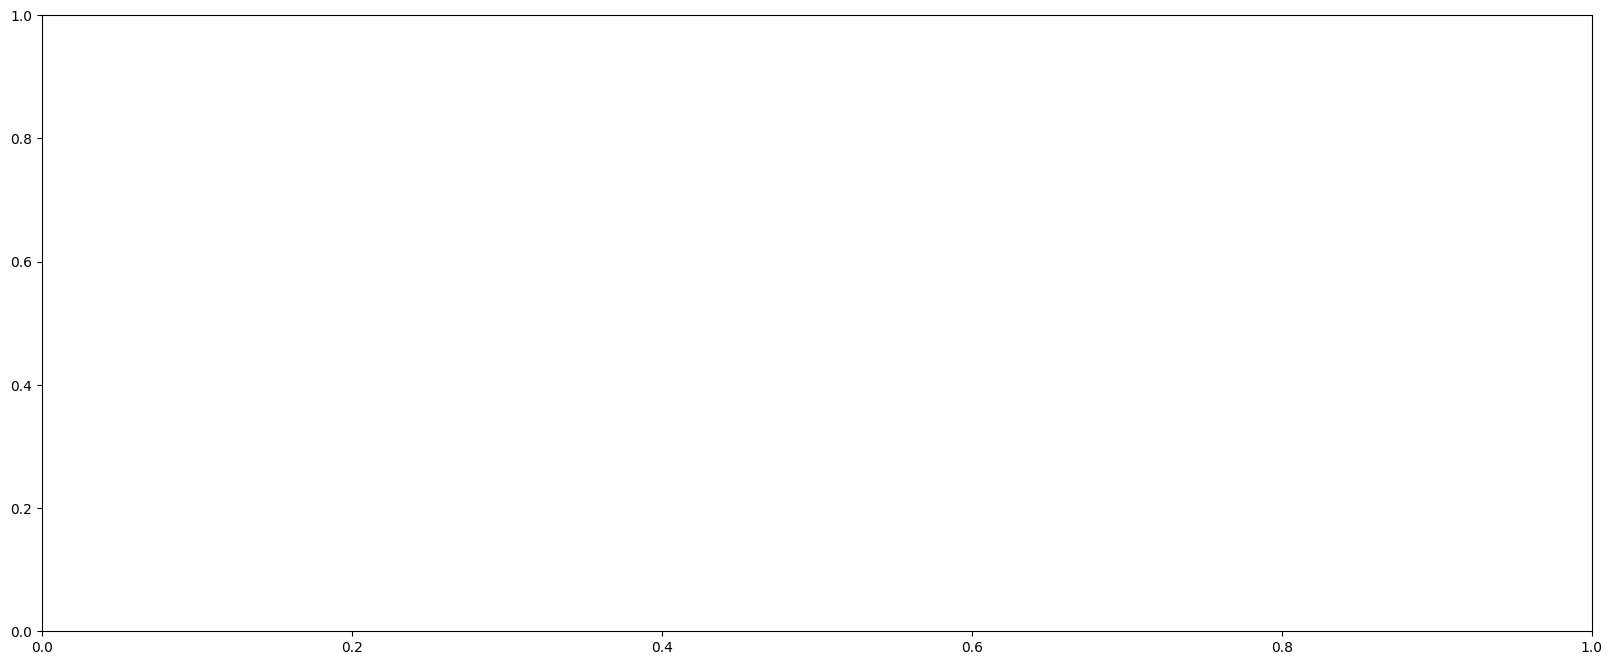

In [55]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
property_type.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()

7888

In [ ]:
# Showing unique values of neighborhoods
listings_df["neighbourhood_cleansed"].unique()
#print(listings_df["neighbourhood"])

array(['Downtown/Civic Center', 'Russian Hill', 'Noe Valley', 'Mission',
       'Nob Hill', 'Bernal Heights', 'West of Twin Peaks',
       'Haight Ashbury', 'Castro/Upper Market', 'Financial District',
       'Outer Mission', 'Marina', 'Inner Sunset', 'South of Market',
       'Twin Peaks', 'Visitacion Valley', 'Chinatown', 'Outer Sunset',
       'Parkside', 'Diamond Heights', 'Western Addition', 'Ocean View',
       'Outer Richmond', 'Inner Richmond', 'Pacific Heights',
       'North Beach', 'Excelsior', 'Glen Park', 'Lakeshore', 'Bayview',
       'Potrero Hill', 'Presidio Heights', 'Seacliff', 'Crocker Amazon',
       'Golden Gate Park', 'Presidio', 'Treasure Island/YBI'],
      dtype=object)

In [ ]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

,proportion
room_type,
Entire home/apt,0.628423
Private room,0.357252
Hotel room,0.007480
Shared room,0.006846


In [ ]:
# Calculating basic statistics of accommodates
listings_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,accommodates
count,7888.000000
mean,3.216024
std,2.004303
min,1.000000
5%,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
95%,7.000000
max,16.000000


<span style="color: red;">What does it mean the value of 0 for this attribute?</span>

In [ ]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

,price_float
count,6190.000000
mean,241.385460
std,470.187742
min,25.000000
5%,57.000000
25%,105.000000
50%,166.000000
75%,261.000000
95%,595.000000
max,25000.000000


[]

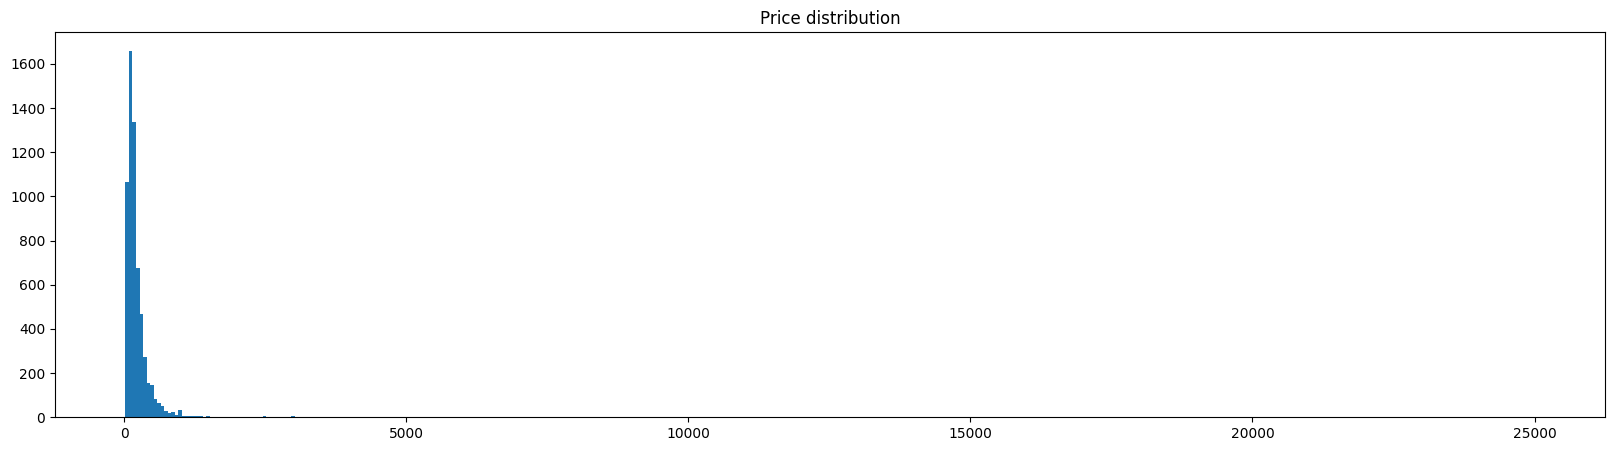

In [ ]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=400)
plt.title("Price distribution")
plt.plot()

<span style="color: red;">This attribute has an extreme outlier making difficult a proper visualization?</span>

In [ ]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

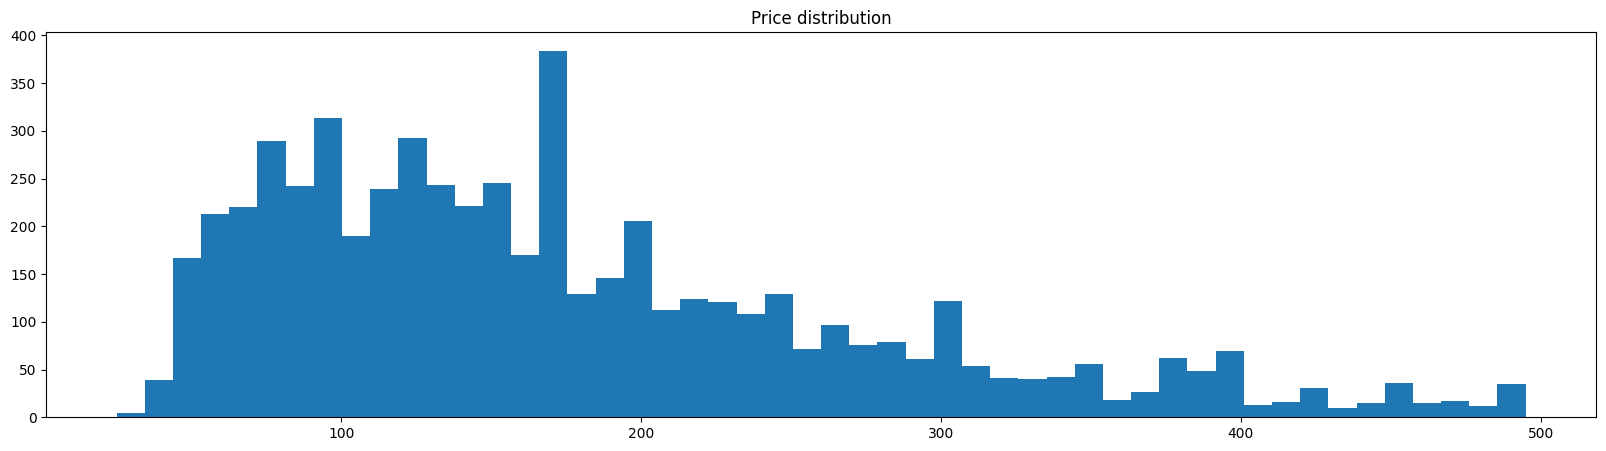

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

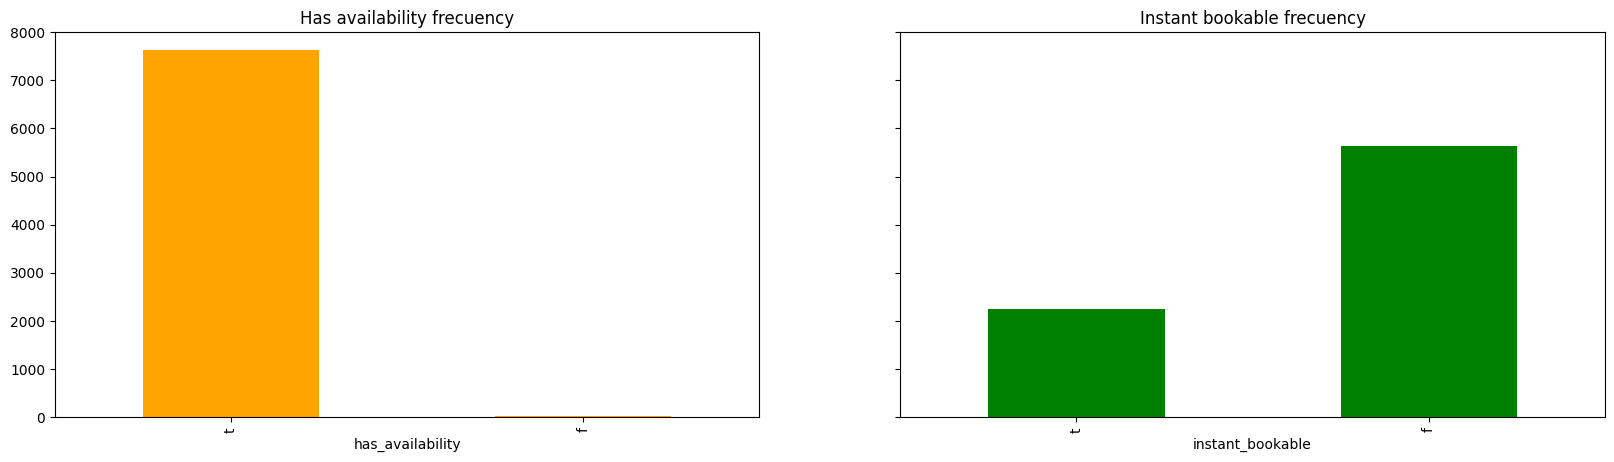

In [ ]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

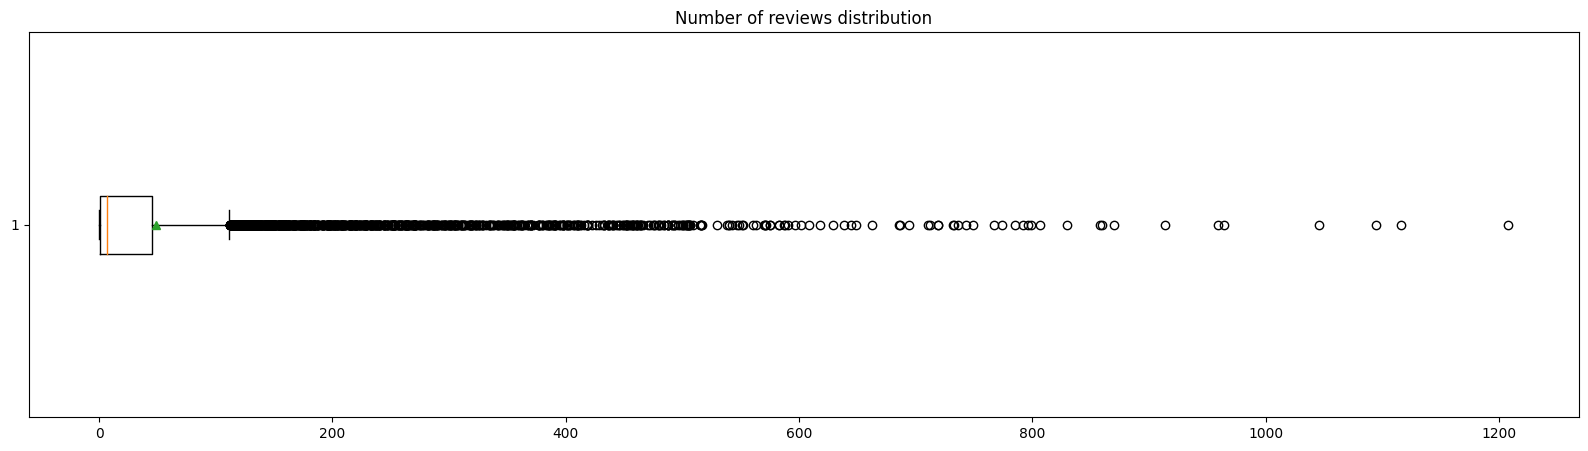

In [ ]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

### 2. Bivariate analysis

In [20]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["availability_365", "price_float", "review_scores_value","property_type"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

ValueError: could not convert string to float: 'Private room in rental unit'

<Figure size 1000x800 with 0 Axes>

In [ ]:
#listings_df.corr()
!pip install --upgrade ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=39993377eb0ca38be3314f57f73ef206e4fe9badcc564623fc3424efc9f47d73
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


NameError: name 'ProfileReport' is not defined

In [ ]:

from ydata_profiling import ProfileReport
profile = ProfileReport(listings_df)
#profile.to_notebook_iframe()
profile.to_file('report_listings.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7fa5f729a760, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Couldn't find space to draw. Either the Canvas size is too small or too much of the image is masked out.

<Figure size 600x400 with 0 Axes>

In [ ]:
total_cols=['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'price_float']

# Convert string column to category
listings_df['neighbourhood_cat_ini'] = listings_df['neighbourhood_cleansed'].astype('category')
# Convert category to numeric codes
listings_df['neighbourhood_cat'] = listings_df['neighbourhood_cat_ini'].cat.codes

# Convert string column to category
listings_df['host_response_rate_cat'] = listings_df['host_response_rate'].astype('category')
# Convert category to numeric codes
listings_df['host_response_rate_cat'] = listings_df['host_response_rate_cat'].cat.codes




cols_to_check=['price_float', 'host_response_rate_cat', 'neighbourhood_cat', 'reviews_per_month', 'availability_365','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']

from ydata_profiling import ProfileReport
profile = ProfileReport(listings_df[ cols_to_check])
#profile.to_notebook_iframe()
profile.to_file('report_listings_df.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7fa5f729a760, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 167>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
listings_df[cols_to_check].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888 entries, 0 to 7887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price_float                  6190 non-null   float64
 1   host_response_rate_cat       7888 non-null   int8   
 2   neighbourhood_cat            7888 non-null   int8   
 3   reviews_per_month            6081 non-null   float64
 4   availability_365             7888 non-null   int64  
 5   review_scores_rating         6081 non-null   float64
 6   review_scores_accuracy       6078 non-null   float64
 7   review_scores_cleanliness    6078 non-null   float64
 8   review_scores_checkin        6077 non-null   float64
 9   review_scores_communication  6078 non-null   float64
 10  review_scores_location       6077 non-null   float64
 11  review_scores_value          6077 non-null   float64
dtypes: float64(9), int64(1), int8(2)
memory usage: 631.8 KB


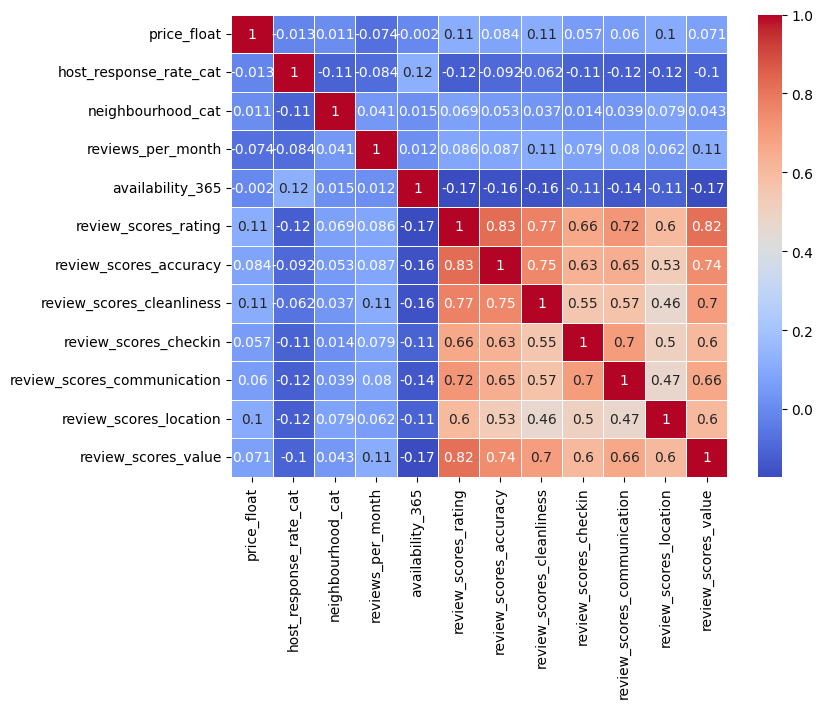

In [ ]:
corr=listings_df[ cols_to_check  ].corr()

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

In [ ]:
# Get category-to-code equivalence
category_codes = dict(enumerate(listings_df['neighbourhood_cat_ini'].cat.categories))

# Print the equivalence of category values and their corresponding codes
print("Category to Code Equivalence:")
for code, category in category_codes.items():
    print(f"{category}: {code}")

Category to Code Equivalence:
Bayview: 0
Bernal Heights: 1
Castro/Upper Market: 2
Chinatown: 3
Crocker Amazon: 4
Diamond Heights: 5
Downtown/Civic Center: 6
Excelsior: 7
Financial District: 8
Glen Park: 9
Golden Gate Park: 10
Haight Ashbury: 11
Inner Richmond: 12
Inner Sunset: 13
Lakeshore: 14
Marina: 15
Mission: 16
Nob Hill: 17
Noe Valley: 18
North Beach: 19
Ocean View: 20
Outer Mission: 21
Outer Richmond: 22
Outer Sunset: 23
Pacific Heights: 24
Parkside: 25
Potrero Hill: 26
Presidio: 27
Presidio Heights: 28
Russian Hill: 29
Seacliff: 30
South of Market: 31
Treasure Island/YBI: 32
Twin Peaks: 33
Visitacion Valley: 34
West of Twin Peaks: 35
Western Addition: 36


In [ ]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(571, 76)

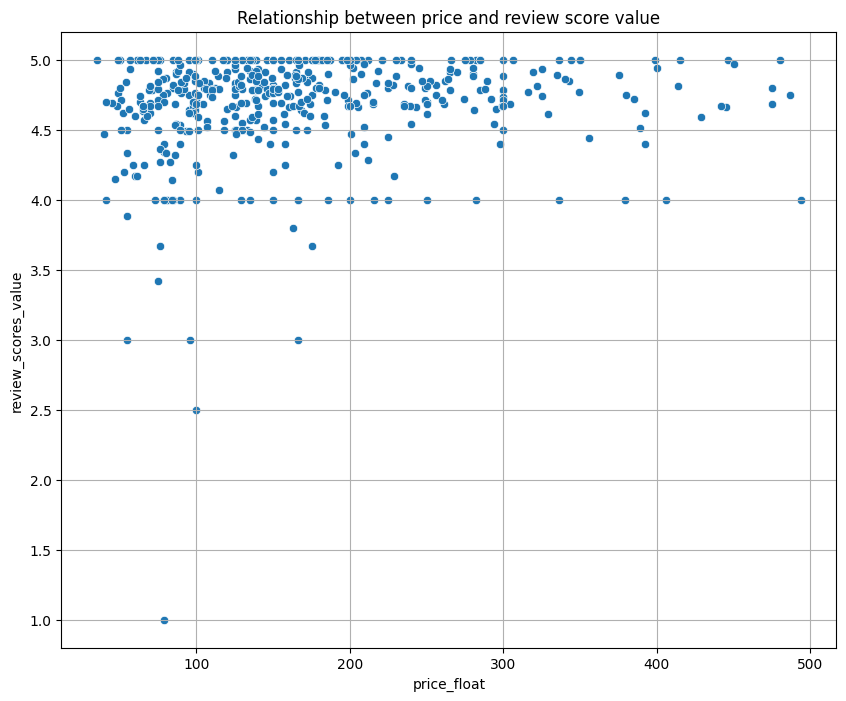

In [ ]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:
# Another common strategy for working with datasets with high variability is by filtering the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

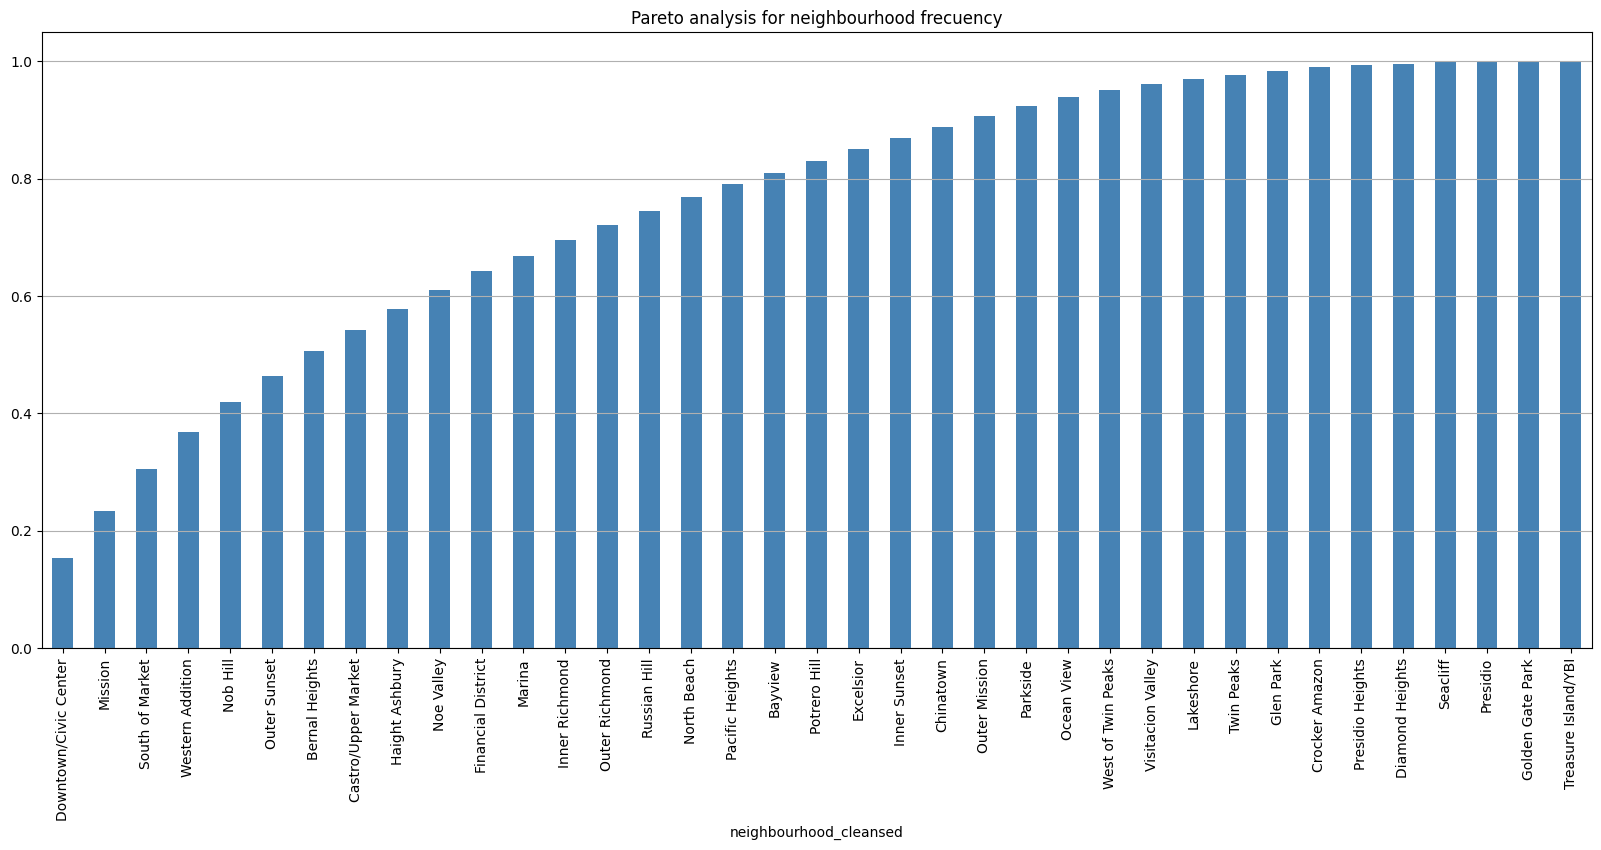

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Downtown/Civic Center',
 'Mission',
 'South of Market',
 'Western Addition',
 'Nob Hill',
 'Outer Sunset',
 'Bernal Heights',
 'Castro/Upper Market',
 'Haight Ashbury',
 'Noe Valley',
 'Financial District',
 'Marina',
 'Inner Richmond',
 'Outer Richmond',
 'Russian Hill',
 'North Beach',
 'Pacific Heights']

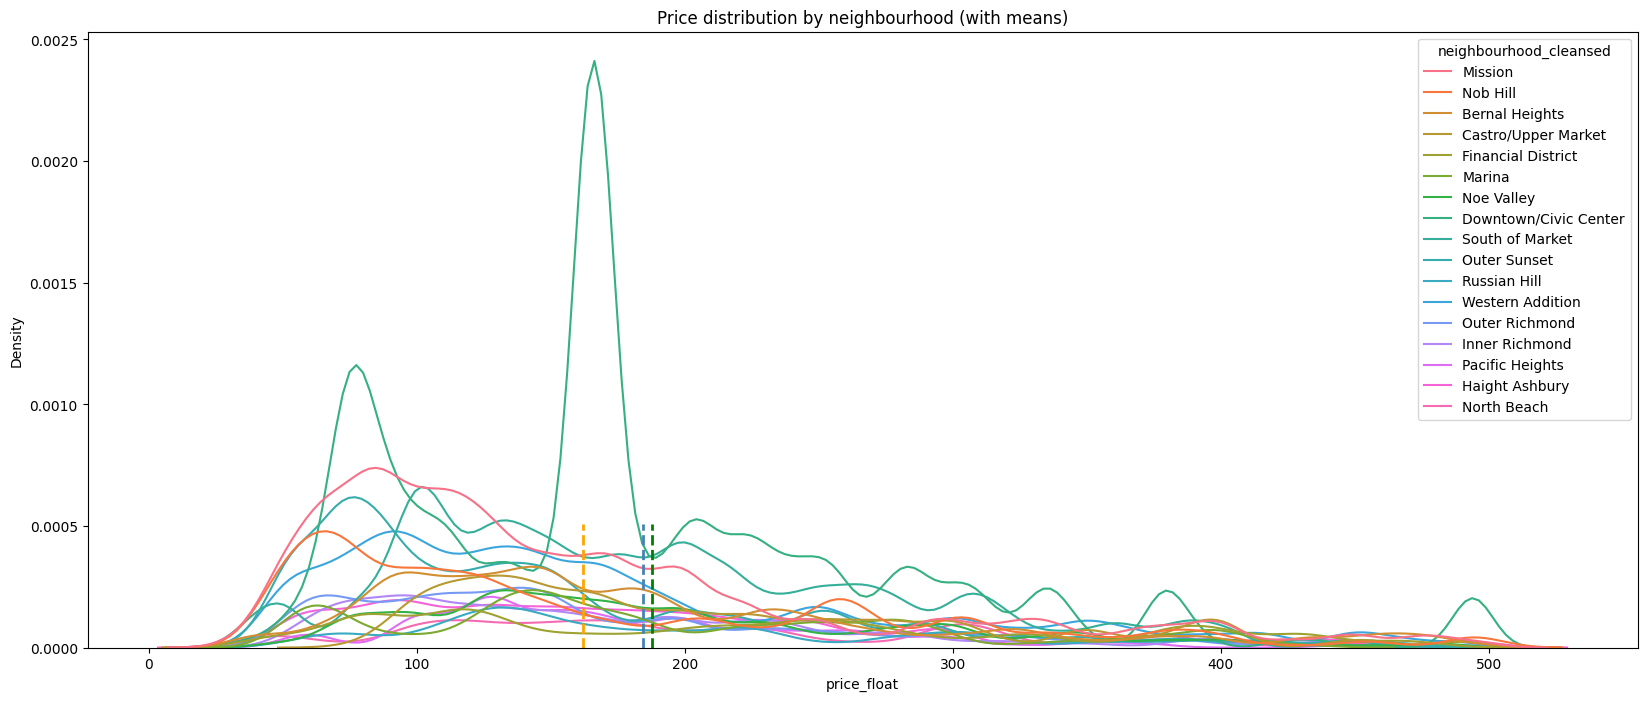

In [ ]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

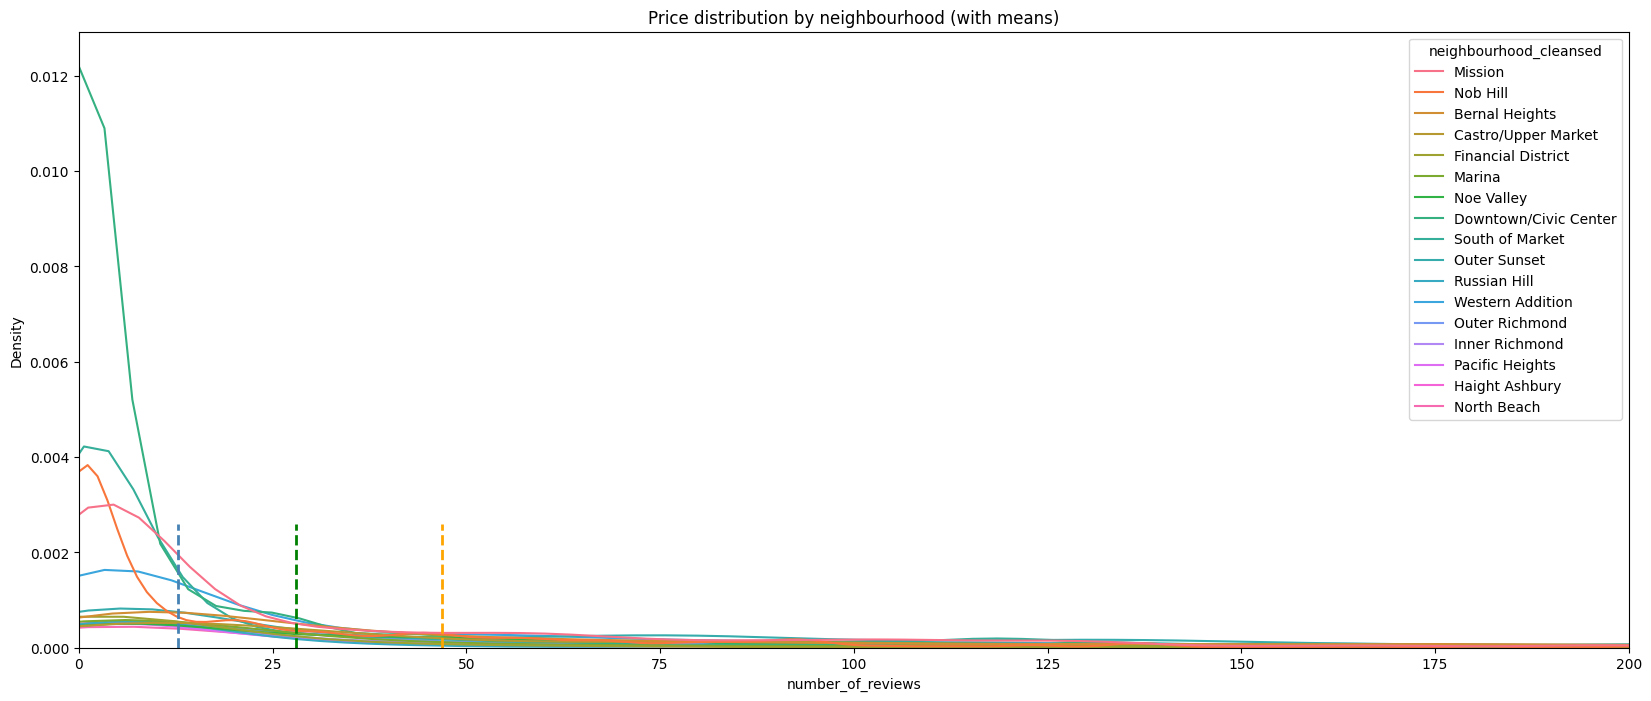

In [ ]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()